### Car Price Prediction

In [621]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

### Dataset

In [622]:
df = pd.read_csv("./dataset/Cars.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [623]:
# df["owner"].drop_duplicates()
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [624]:
### For the feature owner, map First owner to 1, ..., Test Drive Car to 5
mapping = {"First Owner":1,
           "Second Owner":2,
           "Third Owner":3,
           "Fourth & Above Owner":4,
           "Test Drive Car":5}

df["owner"] = df["owner"].map(mapping)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [625]:
# For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

df = df.drop(labels="fuel", axis=1)
df

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [626]:
df

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [627]:
# For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
# Hint: use df.mileage.str.split

mileage = df.mileage.str.rstrip('kmplkm/kg')
# mileage[6]
print(mileage)
print(type(mileage[0]))

0        23.4 
1       21.14 
2        17.7 
3        23.0 
4        16.1 
         ...  
8123     18.5 
8124     16.8 
8125     19.3 
8126    23.57 
8127    23.57 
Name: mileage, Length: 8128, dtype: object
<class 'str'>


In [628]:
mileage = mileage.astype(float)

In [629]:
type(mileage[0])

numpy.float64

In [630]:
df["mileage"] = mileage
df["mileage"]

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: float64

In [631]:
df

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Manual,1,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Manual,4,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Manual,1,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Individual,Manual,1,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [632]:
# For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

engine = df["engine"].str.rstrip('CC')
engine = engine.astype(float)
df["engine"] = engine

In [633]:
df

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Manual,1,18.50,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Manual,4,16.80,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Manual,1,19.30,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Individual,Manual,1,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0


In [634]:
# # Do the same for max power

# max_power = df["max_power"].str.strip('bhp ')
# # max_power.tolist()
# # max_power = max_power.astype(float)
# df["max_power"] = max_power

In [635]:
df = df.drop("max_power", axis=1)

In [636]:
df

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.40,1248.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,2,21.14,1498.0,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,3,17.70,1497.0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.00,1396.0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.10,1298.0,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Manual,1,18.50,1197.0,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Manual,4,16.80,1493.0,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Manual,1,19.30,1248.0,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Individual,Manual,1,23.57,1396.0,140Nm@ 1800-3000rpm,5.0


In [637]:
# For the feature brand, take only the first word and remove the rest

# Change 'name' -> 'brand'
key_value = {"name":"brand"}
df = df.rename(columns=key_value)
df

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,Manual,1,23.40,1248.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,Manual,2,21.14,1498.0,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,Manual,3,17.70,1497.0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,Manual,1,23.00,1396.0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,Manual,1,16.10,1298.0,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Manual,1,18.50,1197.0,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Manual,4,16.80,1493.0,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Manual,1,19.30,1248.0,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Individual,Manual,1,23.57,1396.0,140Nm@ 1800-3000rpm,5.0


In [638]:
# For the feature brand, take only the first word and remove the rest

df["brand"] = df["brand"].str.split().str[0]
df

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,torque,seats
0,Maruti,2014,450000,145500,Individual,Manual,1,23.40,1248.0,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Individual,Manual,2,21.14,1498.0,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Individual,Manual,3,17.70,1497.0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Individual,Manual,1,23.00,1396.0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Individual,Manual,1,16.10,1298.0,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Individual,Manual,1,18.50,1197.0,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Individual,Manual,4,16.80,1493.0,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Individual,Manual,1,19.30,1248.0,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Individual,Manual,1,23.57,1396.0,140Nm@ 1800-3000rpm,5.0


In [639]:
# Drop the feature torque, simply because Chaky’s company does not understand well about it

df = df.drop("torque", axis=1)
df

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Individual,Manual,1,23.40,1248.0,5.0
1,Skoda,2014,370000,120000,Individual,Manual,2,21.14,1498.0,5.0
2,Honda,2006,158000,140000,Individual,Manual,3,17.70,1497.0,5.0
3,Hyundai,2010,225000,127000,Individual,Manual,1,23.00,1396.0,5.0
4,Maruti,2007,130000,120000,Individual,Manual,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Individual,Manual,1,18.50,1197.0,5.0
8124,Hyundai,2007,135000,119000,Individual,Manual,4,16.80,1493.0,5.0
8125,Maruti,2009,382000,120000,Individual,Manual,1,19.30,1248.0,5.0
8126,Tata,2013,290000,25000,Individual,Manual,1,23.57,1396.0,5.0


In [640]:
# You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
# involve this, we will simply delete all samples related to it.

df = df[df.owner != 5]
df

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Individual,Manual,1,23.40,1248.0,5.0
1,Skoda,2014,370000,120000,Individual,Manual,2,21.14,1498.0,5.0
2,Honda,2006,158000,140000,Individual,Manual,3,17.70,1497.0,5.0
3,Hyundai,2010,225000,127000,Individual,Manual,1,23.00,1396.0,5.0
4,Maruti,2007,130000,120000,Individual,Manual,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Individual,Manual,1,18.50,1197.0,5.0
8124,Hyundai,2007,135000,119000,Individual,Manual,4,16.80,1493.0,5.0
8125,Maruti,2009,382000,120000,Individual,Manual,1,19.30,1248.0,5.0
8126,Tata,2013,290000,25000,Individual,Manual,1,23.57,1396.0,5.0


In [641]:
df["brand"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [642]:
new_brand_mapping = {'Maruti':0, 'Skoda':1, 'Honda':2, 'Hyundai':3, 'Toyota':4, 'Ford':5, 'Renault':6,
       'Mahindra':7, 'Tata':8, 'Chevrolet':9, 'Fiat':10, 'Datsun':11, 'Jeep':12,
       'Mercedes-Benz':13, 'Mitsubishi':14, 'Audi':15, 'Volkswagen':16, 'BMW':17,
       'Nissan':18, 'Lexus':19, 'Jaguar':20, 'Land':21, 'MG':22, 'Volvo':23, 'Daewoo':24,
       'Kia':25, 'Force':26, 'Ambassador':27, 'Ashok':28, 'Isuzu':29, 'Opel':30, 'Peugeot':31}

df["brand"] = df["brand"].map(new_brand_mapping)
df

C:\Users\araya\AppData\Local\Temp\ipykernel_11732\3240873570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["brand"] = df["brand"].map(new_brand_mapping)


,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,0,2014,450000,145500,Individual,Manual,1,23.40,1248.0,5.0
1,1,2014,370000,120000,Individual,Manual,2,21.14,1498.0,5.0
2,2,2006,158000,140000,Individual,Manual,3,17.70,1497.0,5.0
3,3,2010,225000,127000,Individual,Manual,1,23.00,1396.0,5.0
4,0,2007,130000,120000,Individual,Manual,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,3,2013,320000,110000,Individual,Manual,1,18.50,1197.0,5.0
8124,3,2007,135000,119000,Individual,Manual,4,16.80,1493.0,5.0
8125,0,2009,382000,120000,Individual,Manual,1,19.30,1248.0,5.0
8126,8,2013,290000,25000,Individual,Manual,1,23.57,1396.0,5.0


In [643]:
print(df["transmission"].unique())
transmission_mapping = {'Manual':0, 'Automatic':1}

df["transmission"] = df["transmission"].map(transmission_mapping)
df

['Manual' 'Automatic']


C:\Users\araya\AppData\Local\Temp\ipykernel_11732\2409546955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transmission"] = df["transmission"].map(transmission_mapping)


,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,0,2014,450000,145500,Individual,0,1,23.40,1248.0,5.0
1,1,2014,370000,120000,Individual,0,2,21.14,1498.0,5.0
2,2,2006,158000,140000,Individual,0,3,17.70,1497.0,5.0
3,3,2010,225000,127000,Individual,0,1,23.00,1396.0,5.0
4,0,2007,130000,120000,Individual,0,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,3,2013,320000,110000,Individual,0,1,18.50,1197.0,5.0
8124,3,2007,135000,119000,Individual,0,4,16.80,1493.0,5.0
8125,0,2009,382000,120000,Individual,0,1,19.30,1248.0,5.0
8126,8,2013,290000,25000,Individual,0,1,23.57,1396.0,5.0


In [644]:
print(df["seller_type"].unique())
seller_type_mapping = {'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}

df["seller_type"] = df["seller_type"].map(seller_type_mapping)
df

['Individual' 'Dealer' 'Trustmark Dealer']


C:\Users\araya\AppData\Local\Temp\ipykernel_11732\4240626244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seller_type"] = df["seller_type"].map(seller_type_mapping)


,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,0,2014,450000,145500,0,0,1,23.40,1248.0,5.0
1,1,2014,370000,120000,0,0,2,21.14,1498.0,5.0
2,2,2006,158000,140000,0,0,3,17.70,1497.0,5.0
3,3,2010,225000,127000,0,0,1,23.00,1396.0,5.0
4,0,2007,130000,120000,0,0,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,3,2013,320000,110000,0,0,1,18.50,1197.0,5.0
8124,3,2007,135000,119000,0,0,4,16.80,1493.0,5.0
8125,0,2009,382000,120000,0,0,1,19.30,1248.0,5.0
8126,8,2013,290000,25000,0,0,1,23.57,1396.0,5.0


### Plot and Visualization

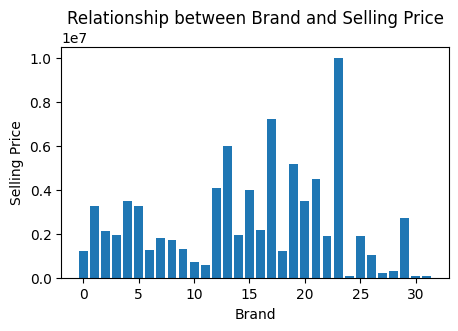

In [645]:
plt.figure(figsize=(5,3))
plt.xlabel("Brand")
plt.ylabel("Selling Price")
plt.title("Relationship between Brand and Selling Price")
plt.bar(df.brand, df.selling_price)
plt.show()

In [646]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Year")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Year and Selling Price")
# plt.bar(df.year, df.selling_price)
# plt.show()

In [647]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Kilometer Driven")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Kilometer Driven and Selling Price")
# plt.scatter(df.km_driven, df.selling_price)
# plt.show()

In [648]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Seller Type")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Seller Type and Selling Price")
# plt.bar(df.seller_type, df.selling_price)
# plt.show()

In [649]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Transmission")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Transmission and Selling Price")
# plt.bar(df.transmission, df.selling_price)
# plt.show()

In [650]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Owner")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Owner and Selling Price")
# plt.bar(df.owner, df.selling_price)
# plt.show()

In [651]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Mileage")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Mileage and Selling Price")
# plt.scatter(df.mileage, df.selling_price)
# plt.show()

In [652]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Engine")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Engine and Selling Price")
# plt.scatter(df.engine, df.selling_price)
# plt.show()

In [653]:
# plt.figure(figsize=(5,3))
# plt.xlabel("Seats")
# plt.ylabel("Selling Price")
# plt.title("Relationship between Seats and Selling Price")
# plt.bar(df.seats, df.selling_price)
# plt.show()

### Preprocessing

In [654]:
# Check Statistic Values
df.describe()

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
count,8123.000000,8123.000000,8.123000e+03,8.123000e+03,8123.000000,8123.000000,8123.000000,7902.000000,7902.000000,7902.000000
mean,4.662071,2013.800813,6.359540e+05,6.985348e+04,0.196110,0.128770,1.460052,19.420371,1458.448114,5.416983
std,5.100557,4.043437,7.991284e+05,5.655102e+04,0.464525,0.334966,0.716687,4.037348,504.017573,0.959834
min,0.000000,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,1.000000,0.000000,624.000000,2.000000
25%,0.000000,2011.000000,2.544995e+05,3.500000e+04,0.000000,0.000000,1.000000,16.780000,1197.000000,5.000000
50%,3.000000,2015.000000,4.500000e+05,6.000000e+04,0.000000,0.000000,1.000000,19.300000,1248.000000,5.000000
75%,7.000000,2017.000000,6.750000e+05,9.800000e+04,0.000000,0.000000,2.000000,22.320000,1582.000000,5.000000
max,31.000000,2020.000000,1.000000e+07,2.360457e+06,2.000000,1.000000,4.000000,42.000000,3604.000000,14.000000


In [655]:
# Check Missing Values
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
seats            221
dtype: int64

In [656]:
df.mean()

brand                 4.662071
year               2013.800813
selling_price    635953.989043
km_driven         69853.481103
seller_type           0.196110
transmission          0.128770
owner                 1.460052
mileage              19.420371
engine             1458.448114
seats                 5.416983
dtype: float64

In [657]:
df = df.fillna(df.mean())
df

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,0,2014,450000,145500,0,0,1,23.40,1248.0,5.0
1,1,2014,370000,120000,0,0,2,21.14,1498.0,5.0
2,2,2006,158000,140000,0,0,3,17.70,1497.0,5.0
3,3,2010,225000,127000,0,0,1,23.00,1396.0,5.0
4,0,2007,130000,120000,0,0,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,3,2013,320000,110000,0,0,1,18.50,1197.0,5.0
8124,3,2007,135000,119000,0,0,4,16.80,1493.0,5.0
8125,0,2009,382000,120000,0,0,1,19.30,1248.0,5.0
8126,8,2013,290000,25000,0,0,1,23.57,1396.0,5.0


In [658]:
df.isnull().sum()

brand            0
year             0
selling_price    0
km_driven        0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

### X and y

In [659]:
X = df.drop("selling_price", axis=1)
X

,brand,year,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,0,2014,145500,0,0,1,23.40,1248.0,5.0
1,1,2014,120000,0,0,2,21.14,1498.0,5.0
2,2,2006,140000,0,0,3,17.70,1497.0,5.0
3,3,2010,127000,0,0,1,23.00,1396.0,5.0
4,0,2007,120000,0,0,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...
8123,3,2013,110000,0,0,1,18.50,1197.0,5.0
8124,3,2007,119000,0,0,4,16.80,1493.0,5.0
8125,0,2009,120000,0,0,1,19.30,1248.0,5.0
8126,8,2013,25000,0,0,1,23.57,1396.0,5.0


In [660]:
y = df["selling_price"]
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8123, dtype: int64

### Feature Scaling

In [661]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['year', 'km_driven', 'mileage', 'engine']

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [662]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

In [663]:
# --- One-hot encoding --- ทำ one hot encoding เพื่อไม่ให้โมเดลเข้าใจผิดว่าข้อมูล["brand", "seller_type", "transmission", "owner"]เป็นข้อมูลแบบต่อเนื่อง
categorical_cols = ["brand", "seller_type", "transmission", "owner"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# one_hot_encoded = encoder.fit_transform(df[categorical_cols])



In [ ]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# data = {
#     'Employee id': [10, 20, 15, 25, 30],
#     'Gender': ['M', 'F', 'F', 'M', 'F'],
#     'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
# }

# df = pd.DataFrame(data)
# print(f"Original Employee Data:\n{df}\n")
# # Use pd.get_dummies() to one-hot encode the categorical columns
# df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)
# print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

# encoder = OneHotEncoder(sparse_output=False)

# categorical_columns = ['Gender', 'Remarks']

# one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# one_hot_df = pd.DataFrame(one_hot_encoded, 
#                           columns=encoder.get_feature_names_out(categorical_columns))

# df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

# print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")

In [664]:
X

,year,km_driven,mileage,engine,seats,brand_1,brand_2,brand_3,brand_4,brand_5,...,brand_28,brand_29,brand_30,brand_31,seller_type_1,seller_type_2,transmission_1,owner_2,owner_3,owner_4
0,0.049265,1.337751,0.999456,-0.423367,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.049265,0.886803,0.431873,0.079568,5.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.929371,1.240488,-0.432059,0.077556,5.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,-0.940053,1.010593,0.898999,-0.125629,5.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.682042,0.886803,-0.833888,-0.322780,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.198065,0.709961,-0.231145,-0.525965,5.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8124,-1.682042,0.869119,-0.658088,0.069509,5.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8125,-1.187383,0.886803,-0.030230,-0.423367,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8126,-0.198065,-0.793200,1.042150,-0.125629,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Split X_train, X_test, y_train, y_test

In [665]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [666]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 42)
(5686,)
(2437, 42)
(2437,)


In [667]:
X_train.isnull().sum()

year              0
km_driven         0
mileage           0
engine            0
seats             0
brand_1           0
brand_2           0
brand_3           0
brand_4           0
brand_5           0
brand_6           0
brand_7           0
brand_8           0
brand_9           0
brand_10          0
brand_11          0
brand_12          0
brand_13          0
brand_14          0
brand_15          0
brand_16          0
brand_17          0
brand_18          0
brand_19          0
brand_20          0
brand_21          0
brand_22          0
brand_23          0
brand_24          0
brand_25          0
brand_26          0
brand_27          0
brand_28          0
brand_29          0
brand_30          0
brand_31          0
seller_type_1     0
seller_type_2     0
transmission_1    0
owner_2           0
owner_3           0
owner_4           0
dtype: int64

### model

In [668]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

### Training model

In [669]:
model.fit(X_train, y_train)

LinearRegression()

### Test and Inference

In [670]:
y_pred = model.predict(X_test)
y_pred

array([1903992.22233562, 3400033.81591775,  898105.03153804, ...,
        -57086.18948255,  475007.21748177, 2477797.83788845])

In [671]:
y_test

5828    1550000
4432    2475000
3631     850000
2638     550000
4710     360000
         ...   
646     2625000
2176     131000
756       50000
2004     700000
2135    1850000
Name: selling_price, Length: 2437, dtype: int64

In [672]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2_score = r2_score(y_true=y_test, y_pred=y_pred)

print(mae)
print(mse)
print(r2_score)

179836.4797539007
100874708834.97646
0.8372381803780014


In [673]:
pd.DataFrame({'actual price':y_test, 'predicted_price':y_pred})

,actual price,predicted_price
5828,1550000,1.903992e+06
4432,2475000,3.400034e+06
3631,850000,8.981050e+05
2638,550000,4.772773e+05
4710,360000,2.235536e+05
...,...,...
646,2625000,2.872041e+06
2176,131000,1.555034e+05
756,50000,-5.708619e+04
2004,700000,4.750072e+05


In [ ]:
2.477798e+06

### Save Scaler

In [688]:
import joblib
joblib.dump(scaler, 'scaler.gz')
my_scaler = joblib.load('scaler.gz')

### Load Scaler

In [689]:
scaler = joblib.load('scaler.gz')
scaler

StandardScaler()

### Save Model

In [690]:
import pickle

filename = "CPModel.pkl"
pickle.dump(model, open(filename, 'wb'))

### Load Model

In [691]:
import pickle

filename = "CPModel.pkl"
loaded_model = pickle.load(open(filename, 'rb'))

In [692]:
loaded_model

LinearRegression()

### Incorrect way

In [ ]:
data = {
    "brand": "Toyota",
    "year": 2018,
    "km_driven": 45000,
    "seller_type": "Dealer",
    "transmission": "Manual",
    "owner": "First Owner",
    "mileage": 18.2,
    "engine": 1498,
    "seats": 5
}

my_data = pd.DataFrame([data])
my_data

In [ ]:
cols_to_scale = ['year', 'km_driven', 'mileage', 'engine']
my_data[cols_to_scale] = scaler.fit_transform(my_data[cols_to_scale])
my_data

In [ ]:
categorical_cols = ["brand", "seller_type", "transmission", "owner"]
pd.get_dummies(my_data, columns=categorical_cols, drop_first=True) # ทำไม่ได้ เพราะค่า dummies จะถูกเปลี่ยน


In [ ]:
my_data

In [ ]:
pred = model.predict(my_data)
pred

In [694]:
df

,brand,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,seats
0,0,2014,450000,145500,0,0,1,23.40,1248.0,5.0
1,1,2014,370000,120000,0,0,2,21.14,1498.0,5.0
2,2,2006,158000,140000,0,0,3,17.70,1497.0,5.0
3,3,2010,225000,127000,0,0,1,23.00,1396.0,5.0
4,0,2007,130000,120000,0,0,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,3,2013,320000,110000,0,0,1,18.50,1197.0,5.0
8124,3,2007,135000,119000,0,0,4,16.80,1493.0,5.0
8125,0,2009,382000,120000,0,0,1,19.30,1248.0,5.0
8126,8,2013,290000,25000,0,0,1,23.57,1396.0,5.0


In [693]:
# สมมติว่า scaler ถูก fit ตอนเทรน
cols_to_scale = ['year', 'km_driven', 'mileage', 'engine']

# และ X.columns เก็บ column ที่ใช้เทรนไว้
trained_columns = X.columns

# ข้อมูลใหม่
new_data = pd.DataFrame([{
    'brand': 'Honda',
    'year': 2006,
    'km_driven': 140000,
    'seller_type': 'Individual',
    'transmission': 'Manual',
    'owner': 'Third Owner',
    'mileage': 17.7,
    'engine': 1497,
    'seats': 5
}])

# mapping และ one-hot เหมือนเดิม
new_data['owner'] = new_data['owner'].map(mapping)
new_data = pd.get_dummies(new_data, columns=['brand', 'seller_type', 'transmission', 'owner'], drop_first=True)

# ทำให้ column ตรงกับของตอนเทรน
new_data = new_data.reindex(columns=trained_columns, fill_value=0)

# scaling เฉพาะคอลัมน์ตัวเลข
new_data[cols_to_scale] = scaler.transform(new_data[cols_to_scale])

# ทำนาย
pred = loaded_model.predict(new_data)
print("Predicted price:", pred[0])

Predicted price: 151052.85652742314


In [675]:
new_data

,year,km_driven,mileage,engine,seats,brand_1,brand_2,brand_3,brand_4,brand_5,...,brand_28,brand_29,brand_30,brand_31,seller_type_1,seller_type_2,transmission_1,owner_2,owner_3,owner_4
0,-1.929371,1.240488,-0.432059,0.077556,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [676]:
X.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'seats', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'brand_9', 'brand_10', 'brand_11', 'brand_12', 'brand_13', 'brand_14',
       'brand_15', 'brand_16', 'brand_17', 'brand_18', 'brand_19', 'brand_20',
       'brand_21', 'brand_22', 'brand_23', 'brand_24', 'brand_25', 'brand_26',
       'brand_27', 'brand_28', 'brand_29', 'brand_30', 'brand_31',
       'seller_type_1', 'seller_type_2', 'transmission_1', 'owner_2',
       'owner_3', 'owner_4'],
      dtype='object')

In [684]:
# รายชื่อคอลัมน์ทั้งหมด
columns = [
    'year', 'km_driven', 'mileage', 'engine', 'seats',
    'brand_1', 'brand_2', 'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
    'brand_9', 'brand_10', 'brand_11', 'brand_12', 'brand_13', 'brand_14', 'brand_15',
    'brand_16', 'brand_17', 'brand_18', 'brand_19', 'brand_20', 'brand_21', 'brand_22',
    'brand_23', 'brand_24', 'brand_25', 'brand_26', 'brand_27', 'brand_28', 'brand_29',
    'brand_30', 'brand_31', 'seller_type_1', 'seller_type_2', 'transmission_1',
    'owner_2', 'owner_3', 'owner_4'
]

# สร้าง DataFrame ว่าง ๆ ที่มีแค่คอลัมน์
test_df = pd.DataFrame(columns=columns)
test_df

,year,km_driven,mileage,engine,seats,brand_1,brand_2,brand_3,brand_4,brand_5,...,brand_28,brand_29,brand_30,brand_31,seller_type_1,seller_type_2,transmission_1,owner_2,owner_3,owner_4


In [685]:
test_df.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'seats', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'brand_9', 'brand_10', 'brand_11', 'brand_12', 'brand_13', 'brand_14',
       'brand_15', 'brand_16', 'brand_17', 'brand_18', 'brand_19', 'brand_20',
       'brand_21', 'brand_22', 'brand_23', 'brand_24', 'brand_25', 'brand_26',
       'brand_27', 'brand_28', 'brand_29', 'brand_30', 'brand_31',
       'seller_type_1', 'seller_type_2', 'transmission_1', 'owner_2',
       'owner_3', 'owner_4'],
      dtype='object')